In [16]:
from scipy.optimize import fixed_point
import numpy as np
import matplotlib.pyplot as plt

In [38]:
class simulation_lj:
    '''class method to run a simulation of identical LJ particles'''
    
    def __init__(self, numOfParticles, dimensionality):
        '''initialise positions, momenta, forces'''
        # create arrays: posiitons, momenta, forces,
        self.N = numParticles
        self.dim = dimensionality
        self.positions = np.zeros((self.N,self.dim))
        self.velocities = np.zeros((self.N,self.dim))
        self.forces = np.zeros((self.N,self.dim))
        self.momenta = np.zeros((self.N,self.dim))
        self.sigma = 1.0
        self.epsilon = 1.0
        self.side = 0.0
    
    def set_positions_cube (self, cubeSide):
        '''set the positions of the particles, randomly inside a cube 
        of length cubeSide'''
        
        self.side = cubeSide
        self.positions = np.random.random_sample( (self.N, self.dim))* self.side
        
    def set_momenta_rest (self):
        '''set the momentum of all particles to zero'''
        
        self.momenta = np.zeros((self.N,self.dim))
        
    def calc_forces(self):
        '''at the current position given by array positions, calculate
        the forces due to LJ interactions between all of them'''
        
        for i in range(0, self.N - 1):
            for j in range(i + 1, self.N):
                r_x = positions[j] - positions[i]
                rmag = np.sqrt(r_x * r_x)
                force_scalar = lj_force(rmag)
                force_x = force_scalar * r_x / rmag
            self.forces[i] = force_x
                
    def lj_force(r):
        
        return 48 * self.epsilon * np.power(self.sigma, 12) / np.power(r, 13) - 24 * self.epsilon * np.power(self.sigma, 6) / np.power(r, 7)
        
    def euler_integrate(self, dt, numSteps):
        '''integrate the Newton Equation of Motion with time step dt, 
        for a total of numSteps times'''
        calc_forces()
        
        for n in range(numSteps):
            
            self.positions += dt * self.velocities
            self.velocities += dt * self.forces 
            
    def write_positions(self, fileName):
        '''write the current positions to the file 'fileName' '''
        
        file = open(fileName, "w") 
        file.write(self.positions)
        file.close()
        
    def potential_energy(self):
        '''calculate the current total Potential energy of the system'''
        
        for p_j in range(self.N):
            for p_i in range(p_j):
                PE +=  self.pe_twoParticle(p_i,p_j)
                
    def pe_twoParticle(self,p_i,p_j):
        '''LJ interaction energy between particle p_i and p_j'''
        d_ij = np.linalg.norm ( self.positions[p_i] - self.positions[p_j])
        p = pow(self.sigma / d_ij, 6)
        return 4*self.epsilon*p*(p-1)
                
    #def test_set_particle_positions():

In [10]:
pos = np.zeros((5,3))
print (pos[4])

[0. 0. 0.]


In [11]:
pos=[[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[16,17,18]]

In [13]:
print (pos[4])

[13, 14, 15]


In [19]:
for idx, vec in enumerate(pos):
    print ("idx=" + str(idx))
    print ("vec=" + str(vec))
    r = np.linalg.norm(np.array(vec)-np.array(pos), axis = 1)
    print (r)
    r = np.delete(r, idx)
    print (r)

idx=0
vec=[1, 2, 3]
[ 0.          5.19615242 10.39230485 15.58845727 20.78460969 25.98076211]
[ 5.19615242 10.39230485 15.58845727 20.78460969 25.98076211]
idx=1
vec=[4, 5, 6]
[ 5.19615242  0.          5.19615242 10.39230485 15.58845727 20.78460969]
[ 5.19615242  5.19615242 10.39230485 15.58845727 20.78460969]
idx=2
vec=[7, 8, 9]
[10.39230485  5.19615242  0.          5.19615242 10.39230485 15.58845727]
[10.39230485  5.19615242  5.19615242 10.39230485 15.58845727]
idx=3
vec=[10, 11, 12]
[15.58845727 10.39230485  5.19615242  0.          5.19615242 10.39230485]
[15.58845727 10.39230485  5.19615242  5.19615242 10.39230485]
idx=4
vec=[13, 14, 15]
[20.78460969 15.58845727 10.39230485  5.19615242  0.          5.19615242]
[20.78460969 15.58845727 10.39230485  5.19615242  5.19615242]
idx=5
vec=[16, 17, 18]
[25.98076211 20.78460969 15.58845727 10.39230485  5.19615242  0.        ]
[25.98076211 20.78460969 15.58845727 10.39230485  5.19615242]


In [45]:
def lj_force(r, epsilon, sigma):
        
        return 48 * epsilon * np.power(
        sigma, 12) / np.power(
        r, 13) - 24 * epsilon * np.power(
        sigma, 6) / np.power(r, 7)
    
f = np.zeros((6, 3))
for i in range(0, 5):
    for j in range(i + 1, 6):
        r_x = np.array(pos[j]) - np.array(pos[i])
        rmag = np.sqrt(r_x * r_x)
        force_scalar = lj_force(rmag, 0.0103, 3.4)
        force_x = force_scalar * r_x / rmag
    f[i] = force_x  #eV Å-1 amu-1
        


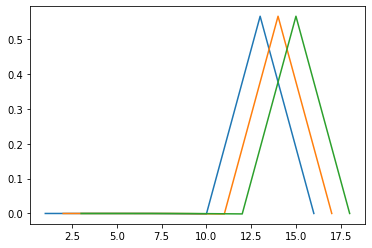

In [46]:
plt.plot(pos,f)